In [ ]:
%%capture
# Installs Unsloth, formers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https ://github.com/unslothai/unsloth.git"
!pip install --no-deps formers trl peft accelerate bitsandbytes

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
model_name = "unsloth/mistral-7b-v0.3",
max_seq_length = max_seq_length,
dtype = dtype,
load_in_4bit = load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2024.12.4: Fast Mistral patching. Transformers:4.46.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.14G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/157 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/137k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
model,
r = 16,
target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
"gate_proj",
"up_proj",
"down_proj",],
lora_alpha = 16,
lora_dropout = 0,
bias = "none",
use_gradient_checkpointing = "unsloth",
random_state = 3407,
use_rslora = False,
loftq_config = None,
)

Unsloth 2024.12.4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import pandas as pd

examples = pd.read_csv("all_data.csv")

In [ ]:
examples = examples[['abstract','label']]

In [ ]:
examples.head(10)

,abstract,label
0,Sentiment classification and sarcasm detection...,0
1,This article aims to explore the security issu...,1
2,Barrier coverage is one of the popular applica...,0
3,Channel estimation and CFO estimation are cruc...,1
4,The Internet of Things IoT is a network of sma...,2
5,A hospital is a complex ecosystem that involve...,2
6,Extractive text summarization is to find the i...,0
7,Robot control has been a challenging task due ...,1
8,In this paper energy management strategy EMS m...,0
9,This article describes a novel approach that u...,2


In [ ]:
l = []
for x,y in zip(examples.head(10)['abstract'],examples.head(10)['label']):
  l.append([x,y])

In [ ]:
few_shot_examples = [
    {
        "input": "Sentiment classification and sarcasm detection are both important natural language processing tasks Sentiment is always coupled with sarcasm where intensive emotion is expressed Nevertheless most literature considers them as two separate tasks We argue that knowledge in sarcasm detection can also be beneficial to sentiment classification and vice versa We show that these two tasks are correlated and present a multitask learningbased framework using a deep neural network that models this correlation to improve the performance of both tasks in a multitask learning setting Our method outperforms the state of the art by 34 in the benchmark dataset",
        "output": 0
    },
    {
        "input": "This article aims to explore the security issues and challenges associated with the Internet of Things IoT in various industries The rapid growth of IoT has raised concerns regarding privacy data security and collaboration among businesses With the increasing use of IoT devices the amount of big data generated has also increased thus posing a significant challenge in terms of data processing and storage Several industries have implemented IoT to improve efficiency and streamline their operations However the lack of standardization and regulation in IoT technology has made it vulnerable to cyber threats Therefore it is crucial for businesses to collaborate and establish a unified security framework to mitigate these risks This paper emphasizes the need for increased awareness and investment in security measures to ensure the privacy and data security of users in the expanding IoT ecosystem",
        "output": 1
    },
    {
        "input": "Barrier coverage is one of the popular applications of Wireless Sensor Networks WSNs A barrier construction algorithm which takes into account both energy efficiency and fault tolerance is critical for the security of missioncritical regions Sensor devices of a sensor network have the capability to monitor and understand the critical environment and if part of the internet of things IoT they can communicate this information to a remote location for immediate action This paper deals with the barrier coverage achieved through sensor nodes and communicate coverage information to a mission partner agency The contributions of this paper are two folds First we propose a disjoint barrier construction algorithm based on the residual energy of sensors Second we propose an IoTenabled paradigm to report barrier coverage information to a mission partner agency for immediate action Simulation results show that the proposed algorithm improves barrier coverage and ensures better barrier lifetime compared to 2 barrier and LABC algorithms",
        "output": 0
    },
    {
        "input": "The Internet of Things IoT is a network of smart objects that communicate with each other These objects are connected to the internet and can send and receive information One of the most important applications of IoT is in the creation of smart cities Smart cities utilize sensing devices actuators and other interconnected nodes to automate realworld systems including homes offices and transportation systems However proper validation and verification of smart city models is needed to ensure their effectiveness In this paper we propose a formal method and graph theorybased smart parking system as a proof of concept for smart cities Our system represents the parking topology through a graph with nodes indicating parking areas passages entrance and exit points The connectivity of these points is represented through directional and bidirectional edges Using graph theory provides numerous benefits including its use as a data structure and algorithmic power Additionally the graphbased model is easily transformable into a formal model To describe the formal specification our system uses the Vienna Development MethodSpecification Language VDMSL The correctness of our system is then proven by utilizing the VDMSL toolbox Through this proposed system smart cities all over the world can easily search for empty parking spaces and find the shortest paths for parking and exiting procedures illustrating further the importance of IoT and formal methods in creating efficient and effective smart cities",
        "output": 2
    },
]

def predict_text_source(text, examples):
    """
    Generates a prompt for few-shot CoT prediction for text source classification.
    """
    prompt = "Determine whether the given text is:\nHuman Written (0), AI Generated (1), or Paraphrased (2).\n\nExamples:\n"

    for example in examples:
        prompt += f"Input: {example['input']}\nOutput: {example['output']}\n\n"

    prompt += f"Now, classify the following text:\nInput: {text}\nOutput:"
    return prompt

# Example usage:
new_text = "Channel estimation and CFO estimation are crucial tasks in wireless communication systems including OFDM and GFDM systems In this paper we propose a robust semiblind estimation scheme..."
generated_prompt = predict_text_source(new_text, few_shot_examples)

print(generated_prompt)


Determine whether the given text is:
Human Written (0), AI Generated (1), or Paraphrased (2).

Examples:
Input: Sentiment classification and sarcasm detection are both important natural language processing tasks Sentiment is always coupled with sarcasm where intensive emotion is expressed Nevertheless most literature considers them as two separate tasks We argue that knowledge in sarcasm detection can also be beneficial to sentiment classification and vice versa We show that these two tasks are correlated and present a multitask learningbased framework using a deep neural network that models this correlation to improve the performance of both tasks in a multitask learning setting Our method outperforms the state of the art by 34 in the benchmark dataset
Output: 0

Input: This article aims to explore the security issues and challenges associated with the Internet of Things IoT in various industries The rapid growth of IoT has raised concerns regarding privacy data security and collabora

In [ ]:
l

[['Sentiment classification and sarcasm detection are both important natural language processing tasks Sentiment is always coupled with sarcasm where intensive emotion is expressed Nevertheless most literature considers them as two separate tasks We argue that knowledge in sarcasm detection can also be beneficial to sentiment classification and vice versa We show that these two tasks are correlated and present a multitask learningbased framework using a deep neural network that models this correlation to improve the performance of both tasks in a multitask learning setting Our method outperforms the state of the art by 34 in the benchmark dataset',
  0],
 ['This article aims to explore the security issues and challenges associated with the Internet of Things IoT in various industries The rapid growth of IoT has raised concerns regarding privacy data security and collaboration among businesses With the increasing use of IoT devices the amount of big data generated has also increased thu

In [ ]:
# Define the few-shot examples
few_shot_examples = [
    {
        "input": "Sentiment classification and sarcasm detection are both important natural language processing tasks Sentiment is always coupled with sarcasm where intensive emotion is expressed Nevertheless most literature considers them as two separate tasks We argue that knowledge in sarcasm detection can also be beneficial to sentiment classification and vice versa We show that these two tasks are correlated and present a multitask learningbased framework using a deep neural network that models this correlation to improve the performance of both tasks in a multitask learning setting Our method outperforms the state of the art by 34 in the benchmark dataset",
        "output": 0
    },
    {
        "input": "This article aims to explore the security issues and challenges associated with the Internet of Things IoT in various industries The rapid growth of IoT has raised concerns regarding privacy data security and collaboration among businesses With the increasing use of IoT devices the amount of big data generated has also increased thus posing a significant challenge in terms of data processing and storage Several industries have implemented IoT to improve efficiency and streamline their operations However the lack of standardization and regulation in IoT technology has made it vulnerable to cyber threats Therefore it is crucial for businesses to collaborate and establish a unified security framework to mitigate these risks This paper emphasizes the need for increased awareness and investment in security measures to ensure the privacy and data security of users in the expanding IoT ecosystem",
        "output": 1
    },
    {
        "input": "Barrier coverage is one of the popular applications of Wireless Sensor Networks WSNs A barrier construction algorithm which takes into account both energy efficiency and fault tolerance is critical for the security of missioncritical regions Sensor devices of a sensor network have the capability to monitor and understand the critical environment and if part of the internet of things IoT they can communicate this information to a remote location for immediate action This paper deals with the barrier coverage achieved through sensor nodes and communicate coverage information to a mission partner agency The contributions of this paper are two folds First we propose a disjoint barrier construction algorithm based on the residual energy of sensors Second we propose an IoTenabled paradigm to report barrier coverage information to a mission partner agency for immediate action Simulation results show that the proposed algorithm improves barrier coverage and ensures better barrier lifetime compared to 2 barrier and LABC algorithms",
        "output": 0
    },
    {
        "input": "The Internet of Things IoT is a network of smart objects that communicate with each other These objects are connected to the internet and can send and receive information One of the most important applications of IoT is in the creation of smart cities Smart cities utilize sensing devices actuators and other interconnected nodes to automate realworld systems including homes offices and transportation systems However proper validation and verification of smart city models is needed to ensure their effectiveness In this paper we propose a formal method and graph theorybased smart parking system as a proof of concept for smart cities Our system represents the parking topology through a graph with nodes indicating parking areas passages entrance and exit points The connectivity of these points is represented through directional and bidirectional edges Using graph theory provides numerous benefits including its use as a data structure and algorithmic power Additionally the graphbased model is easily transformable into a formal model To describe the formal specification our system uses the Vienna Development MethodSpecification Language VDMSL The correctness of our system is then proven by utilizing the VDMSL toolbox Through this proposed system smart cities all over the world can easily search for empty parking spaces and find the shortest paths for parking and exiting procedures illustrating further the importance of IoT and formal methods in creating efficient and effective smart cities",
        "output": 2
    },
]

# Construct the few-shot prompt
alpaca_prompt = "Determine whether the given text is Human-written (0), AI-generated (1), or Paraphrased (2). Here are some examples:\n\n"
for example in few_shot_examples:
    alpaca_prompt += f"Input: {example['input']}\nOutput: {example['output']}\n\n"

# Add the new text to classify
alpaca_prompt += (
    "Now, classify the following text:\n"
    "Input: The chatgpt models usually use input prompts from users and give an output which is as good as human response.\n"
    "Output:"
)

# Tokenize the few-shot prompt and prepare inputs
inputs = tokenizer(
    [alpaca_prompt], return_tensors="pt"
).to("cuda")

# Generate the output
outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)
decoded_outputs = tokenizer.batch_decode(outputs)

# Print the result
print(decoded_outputs)


['<s> Determine whether the given text is Human-written (0), AI-generated (1), or Paraphrased (2). Here are some examples:\n\nInput: Sentiment classification and sarcasm detection are both important natural language processing tasks Sentiment is always coupled with sarcasm where intensive emotion is expressed Nevertheless most literature considers them as two separate tasks We argue that knowledge in sarcasm detection can also be beneficial to sentiment classification and vice versa We show that these two tasks are correlated and present a multitask learningbased framework using a deep neural network that models this correlation to improve the performance of both tasks in a multitask learning setting Our method outperforms the state of the art by 34 in the benchmark dataset\nOutput: 0\n\nInput: This article aims to explore the security issues and challenges associated with the Internet of Things IoT in various industries The rapid growth of IoT has raised concerns regarding privacy dat

In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""


EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = ["Determine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased."] * len(examples["abstract"])
    inputs       = examples["abstract"]
    outputs      = examples["label"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Add EOS_TOKEN to ensure generation terminates
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return {"text": texts}
pass

from datasets import load_dataset

# Specify the path to your CSV file
csv_file_path = "all_data.csv"

# Load the dataset from the CSV file
dataset = load_dataset("csv", data_files=csv_file_path, split="train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 100,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    ),
)

Map (num_proc=2):   0%|          | 0/46181 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 46,181 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 100
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,1.410300
2,1.313800
3,1.145600
4,1.247200
5,1.513600
6,1.264400
7,1.129000
8,1.425400
9,1.389400
10,1.230400


In [ ]:
# Save the fine-tuned model and tokenizer
output_dir = "fine_tuned_model"  # Specify the directory to save the model
trainer.model.save_pretrained(output_dir)
trainer.tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Model and tokenizer saved to fine_tuned_model


In [ ]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Determine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.",
        "The chatgpt models usually uses input prompts form users and gives an output which is as good as human response.", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<s> Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nDetermine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.\n\n### Input:\nThe chatgpt models usually uses input prompts form users and gives an output which is as good as human response.\n\n### Response:\n0</s>']

In [ ]:
print(tokenizer.batch_decode(outputs))

['<s> Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nDetermine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.\n\n### Input:\nThe rise of AI tools like ChatGPT and Grammarly has made it increasingly difficult to differentiate between human-written and AI-generated content, posing a significant challenge to content authenticity.\n\n### Response:\n1</s>']


In [ ]:
from tqdm import tqdm
sampled_data = examples.sample(n=1000, random_state=42)

# Define the prompt format
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Determine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.

### Input:
{}

### Response:
{}"""

# Initialize lists for storing results
y_true = []
y_pred = []

# Generate predictions for each row in the dataset
for index, row in tqdm(sampled_data.iterrows(), total=len(sampled_data)):
    input_text = row['abstract']
    ground_truth = row['label']  # Ground truth label

    # Tokenize the input text with the alpaca prompt
    inputs = tokenizer(
        [
            alpaca_prompt.format(input_text, "")  # Leave response blank for generation
        ],
        return_tensors="pt"
    ).to("cuda")

    # Generate prediction
    outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)
    decoded_output = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

    # Extract the prediction (value after "Response:\n")
    prediction = decoded_output.split("### Response:\n")[-1].strip()
    if prediction.endswith("</s>"):  # Handle end token
        prediction = prediction[:-4].strip()

    # Append to lists
    y_true.append(ground_truth)
    y_pred.append(int(prediction))

# Convert to arrays (optional, for use with sklearn metrics)
y_true = pd.Series(y_true).to_numpy()
y_pred = pd.Series(y_pred).to_numpy()

print("Generated predictions and ground truth labels!")

100%|██████████| 1000/1000 [09:20<00:00,  1.78it/s]

Generated predictions and ground truth labels!


In [ ]:
import torch
from torch.nn.functional import softmax
from tqdm import tqdm

# Sampled data for predictions
sampled_data = examples.sample(n=100, random_state=42)

# Define the prompt format
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Determine whether the given text is Human-written, AI-generated, or Paraphrased. Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.

### Input:
{}

### Response:
{}"""

# Initialize lists for storing results
y_true = []
y_pred = []
y_pred_prob = []  # To store predicted probabilities

# Generate predictions for each row in the dataset
for index, row in tqdm(sampled_data.iterrows(), total=len(sampled_data)):
    input_text = row['abstract']
    ground_truth = row['label']  # Ground truth label

    # Tokenize the input text with the alpaca prompt
    inputs = tokenizer(
        [
            alpaca_prompt.format(input_text, "")  # Leave response blank for generation
        ],
        return_tensors="pt"
    ).to("cuda")

    # Generate prediction (logits) - model output without applying softmax
    outputs = model.generate(**inputs, max_new_tokens=64, return_dict_in_generate=True, output_scores=True)
    logits = outputs.scores[-1]  # Get logits from the last generated token

    # Apply softmax to logits to get probabilities
    probs = softmax(logits, dim=-1).cpu().detach().numpy()

    # Convert logits to predicted class (index of max probability)
    predicted_class = probs.argmax(axis=-1).item()

    # Append to results
    y_true.append(ground_truth)
    y_pred.append(predicted_class)
    y_pred_prob.append(probs[0])  # Store the probabilities

# Convert to arrays (optional, for use with sklearn metrics)
y_true = pd.Series(y_true).to_numpy()
y_pred = pd.Series(y_pred).to_numpy()
y_pred_prob = pd.Series(y_pred_prob).to_numpy()

print("Generated predictions, ground truth labels, and probabilities!")


100%|██████████| 100/100 [00:57<00:00,  1.73it/s]

Generated predictions, ground truth labels, and probabilities!


In [ ]:
len(y_pred_prob[0])

32768

In [ ]:
from prettytable import PrettyTable

# Define hyperparameters
hyperparameters = {
    "Model Name": "unsloth/mistral-7b-v0.3",  # Replace with your model name
    "Batch Size": 2,
    "Gradient Accumulation Steps": 4,
    "Warmup Steps": 5,
    "Number of Epochs": 1,
    "Learning Rate": 2e-4,
    "FP16 Enabled": True,
    "Weight Decay": 0.01,
    "Optimizer": "adamw_8bit",
    "LR Scheduler": "linear",
    "Seed": 3407,
    "Output Directory": "outputs",
}

# Create a table
table = PrettyTable()
table.field_names = ["Hyperparameter", "Value"]

# Add rows to the table
for key, value in hyperparameters.items():
    table.add_row([key, value])

# Print the table
print(table)


+-----------------------------+-------------------------+
|        Hyperparameter       |          Value          |
+-----------------------------+-------------------------+
|          Model Name         | unsloth/mistral-7b-v0.3 |
|          Batch Size         |            2            |
| Gradient Accumulation Steps |            4            |
|         Warmup Steps        |            5            |
|       Number of Epochs      |            1            |
|        Learning Rate        |          0.0002         |
|         FP16 Enabled        |           True          |
|         Weight Decay        |           0.01          |
|          Optimizer          |        adamw_8bit       |
|         LR Scheduler        |          linear         |
|             Seed            |           3407          |
|       Output Directory      |         outputs         |
+-----------------------------+-------------------------+


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)
from itertools import cycle

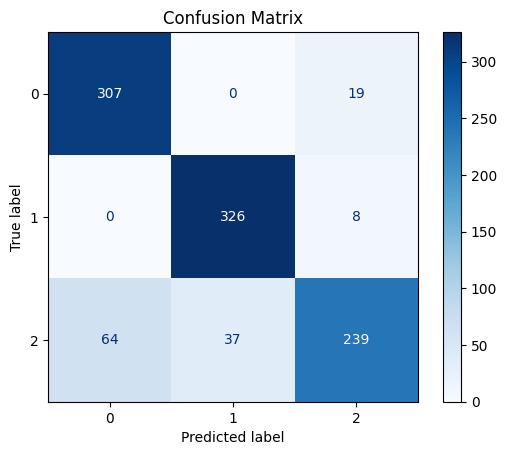

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(y_true, y_pred, [0,1,2])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=["Human-written", "AI-generated", "Paraphrased"])

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

Human-written       0.83      0.94      0.88       326
 AI-generated       0.90      0.98      0.94       334
  Paraphrased       0.90      0.70      0.79       340

     accuracy                           0.87      1000
    macro avg       0.87      0.87      0.87      1000
 weighted avg       0.88      0.87      0.87      1000



Few Shot

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Classification Report:

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        38
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        25

    accuracy                           0.38       100
   macro avg       0.13      0.33      0.18       100
weighted avg       0.14      0.38      0.21       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


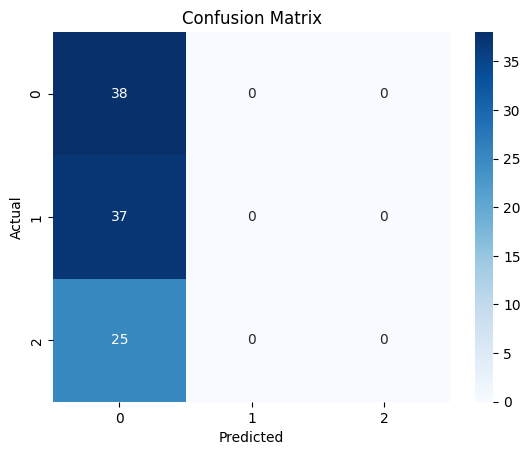

In [ ]:
# Split into few-shot examples (training) and test set
few_shot_examples = examples.sample(10, random_state=42)  # 10 few-shot examples
remaining_examples = examples.drop(few_shot_examples.index)

# Limit test set to 100 examples
test_set = remaining_examples.sample(100, random_state=42)

# Construct the few-shot prompt
alpaca_prompt = "Determine whether the given text is Human-written (0), AI-generated (1), or Paraphrased (2). Here are some examples:\n\n"
for _, row in few_shot_examples.iterrows():
    alpaca_prompt += f"Input: {row['abstract']}\nOutput: {row['label']}\n\n"

# Placeholder for predictions
predictions = []

# Predict using few-shot technique for each test input
for _, row in test_set.iterrows():
    # Add the test input to classify
    current_prompt = alpaca_prompt + f"Now, classify the following text:\nInput: {row['abstract']}\nOutput:"

    # Tokenize and prepare inputs
    inputs = tokenizer([current_prompt], return_tensors="pt").to("cuda")

    # Generate the output
    outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)
    decoded_output = tokenizer.batch_decode(outputs)[0]

    # Extract predicted label using regex
    match = re.search(r"\b(0|1|2)\b", decoded_output)
    if match:
        predicted_label = int(match.group(1))
    else:
        predicted_label = -1  # Assign an invalid value if no label is found

    predictions.append(predicted_label)

# Add predictions to the test set
test_set["predicted_label"] = predictions

# Filter out any invalid predictions (-1) for evaluation
valid_test_set = test_set[test_set["predicted_label"] != -1]

# Generate classification report and confusion matrix
print("Classification Report:\n")
print(classification_report(valid_test_set["label"], valid_test_set["predicted_label"]))

# Confusion Matrix
conf_matrix = confusion_matrix(valid_test_set["label"], valid_test_set["predicted_label"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        39
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        30

    accuracy                           0.39       100
   macro avg       0.13      0.33      0.19       100
weighted avg       0.15      0.39      0.22       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


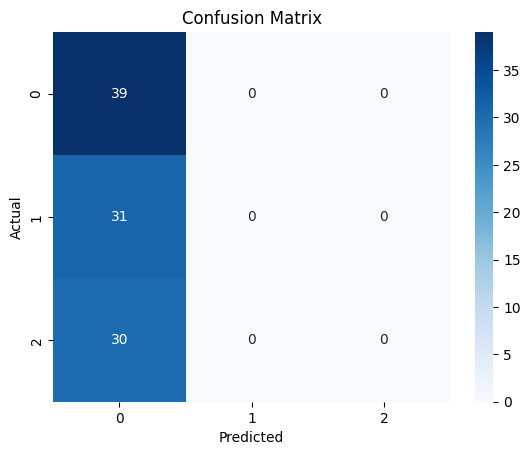

In [ ]:
import re
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Limit the dataset to 100 examples for testing
test_set = examples.sample(100, random_state=42)

# Define the Alpaca prompt template
alpaca_prompt = """
Determine whether the given text is Human-written, AI-generated, or Paraphrased.
Assign the label 0 for Human-written, 1 for AI-generated, and 2 for Paraphrased.

Input: {}
Output: """

# Placeholder for predictions
predictions = []

# Enable native 2x faster inference
FastLanguageModel.for_inference(model)

# Predict for each test example
for _, row in test_set.iterrows():
    # Format the prompt for the current example
    current_prompt = alpaca_prompt.format(row['abstract'])

    # Tokenize and prepare inputs
    inputs = tokenizer([current_prompt], return_tensors="pt").to("cuda")

    # Generate the output
    outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)
    decoded_output = tokenizer.batch_decode(outputs)[0]

    # Extract predicted label using regex
    match = re.search(r"\b(0|1|2)\b", decoded_output)
    if match:
        predicted_label = int(match.group(1))
    else:
        predicted_label = -1  # Assign an invalid value if no label is found

    predictions.append(predicted_label)

# Add predictions to the test set
test_set["predicted_label"] = predictions

# Filter out any invalid predictions (-1) for evaluation
valid_test_set = test_set[test_set["predicted_label"] != -1]

# Generate classification report and confusion matrix
print("Classification Report:\n")
print(classification_report(valid_test_set["label"], valid_test_set["predicted_label"]))

# Confusion Matrix
conf_matrix = confusion_matrix(valid_test_set["label"], valid_test_set["predicted_label"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
